In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df= pd.read_csv("//content/drive/MyDrive/Portofolio/Analisis Penjualan Supermarket/supermarket_sales - Sheet1.csv")

In [ ]:
df['Date'] = pd.to_datetime(df.Date)
df['Bulan'] = pd.to_datetime(df['Date']).dt.month
df['Tahun'] = pd.to_datetime(df['Date']).dt.year
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Bulan,Tahun
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,2019


**Mencari Penjualan Terbanyak**

In [ ]:
df['Bulan'].value_counts()

1    352
3    345
2    303
Name: Bulan, dtype: int64

In [ ]:
kelompok_bulan=df.groupby('Bulan').sum()

<ipython-input-26-b69b19eb37fb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kelompok_bulan=df.groupby('Bulan').sum()


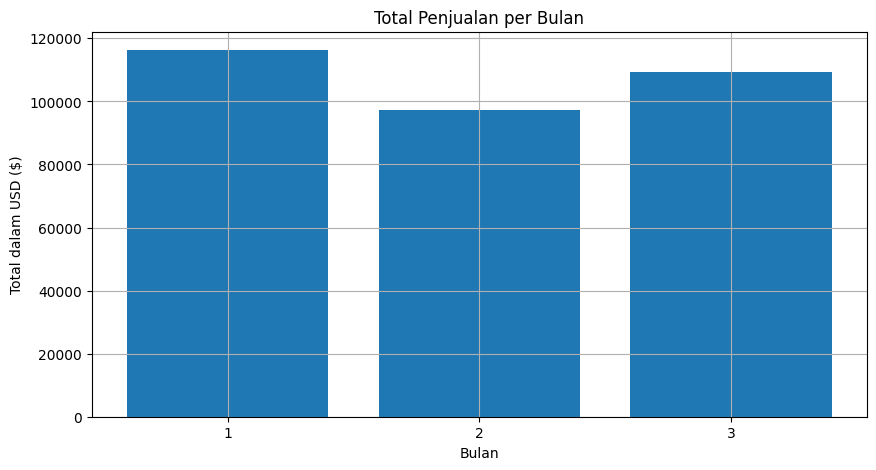

In [ ]:
bulan = [Bulan for Bulan, df in df.groupby('Bulan')]
plt.figure(figsize=(10,5))
plt.bar(bulan, kelompok_bulan['Total'])
plt.xticks(bulan)
plt.title('Total Penjualan per Bulan')
plt.ylabel('Total dalam USD ($)')
plt.xlabel('Bulan')
plt.grid()
plt.show()

**Total Transaksi**

In [ ]:
import seaborn as sns

In [ ]:
total_transaksi=df.groupby('Payment').sum()

<ipython-input-36-77e6b0bfb629>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_transaksi=df.groupby('Payment').sum()


In [ ]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

[Text(0.5, 1.0, 'Metode Transaksi Terbanyak diberbagai Cabang')]

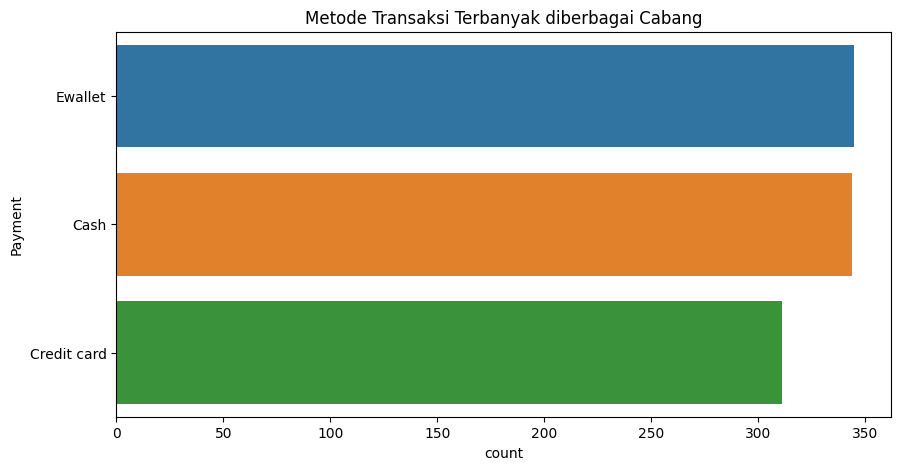

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(y='Payment', data=df, hue_order='City').set(title='Metode Transaksi Terbanyak diberbagai Cabang')

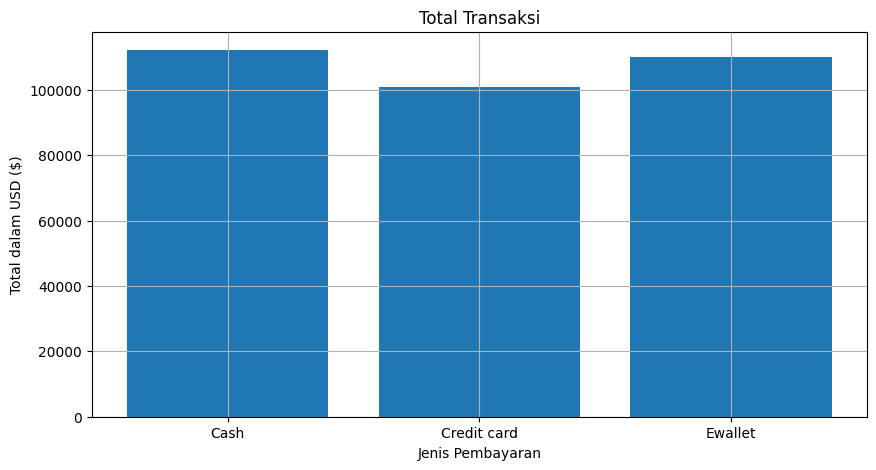

In [ ]:
transaksi = [Payment for Payment, df in df.groupby('Payment')]
plt.figure(figsize=(10,5))
plt.bar(transaksi, total_transaksi['Total'])
plt.xticks(transaksi)
plt.title('Total Transaksi')
plt.ylabel('Total dalam USD ($)')
plt.xlabel('Jenis Pembayaran')
plt.grid()
plt.show()

In [ ]:
total=df.groupby(['Payment']).sum().sort_values('Total',ascending= False)
fixtotal = total[['Total','gross income']].round(2)
fixtotal

<ipython-input-53-f8996cad0be5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=df.groupby(['Payment']).sum().sort_values('Total',ascending= False)


,Total,gross income
Payment,,
Cash,112206.57,5343.17
Ewallet,109993.11,5237.77
Credit card,100767.07,4798.43


[Text(0.5, 1.0, 'Payment dalam Tiap Jenis Produk Masing-Masing Kota')]

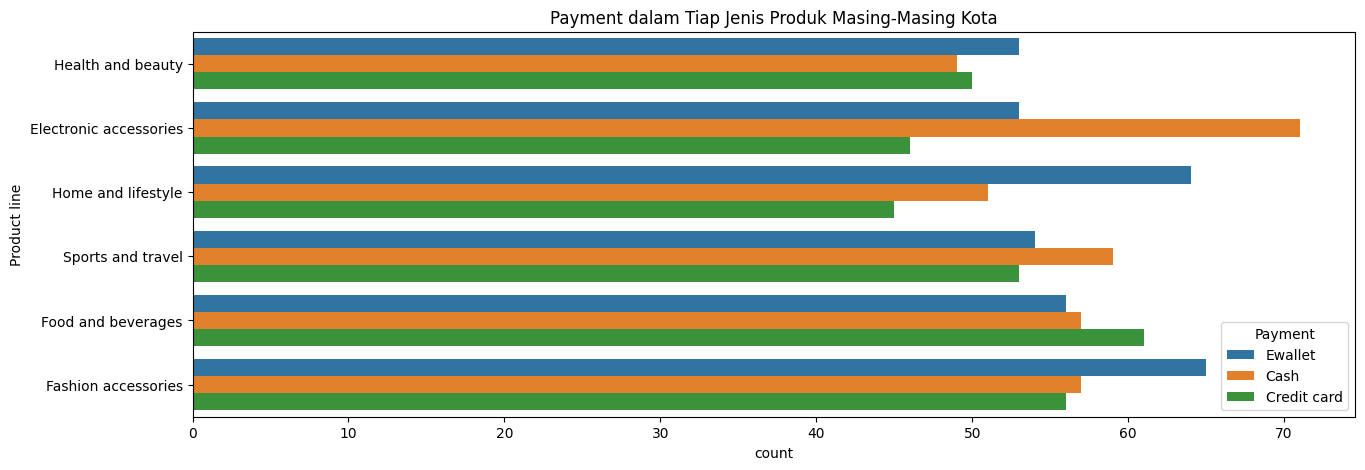

In [ ]:
plt.figure(figsize= (15,5))
sns.countplot(y='Product line', data= df, hue='Payment').set(title='Payment dalam Tiap Jenis Produk Masing-Masing Kota')

**Member vs NonMember**

In [ ]:
plt.figure(figsize=(10,5))
ct = df['Customer type'].value_counts()
print(ct)

Member    501
Normal    499
Name: Customer type, dtype: int64


<Figure size 1000x500 with 0 Axes>

**Produk yang Sering Dibeli**

In [ ]:
Produk = df.groupby('Product line').sum()

<ipython-input-101-ed50f5e9d8f1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Produk = df.groupby('Product line').sum()


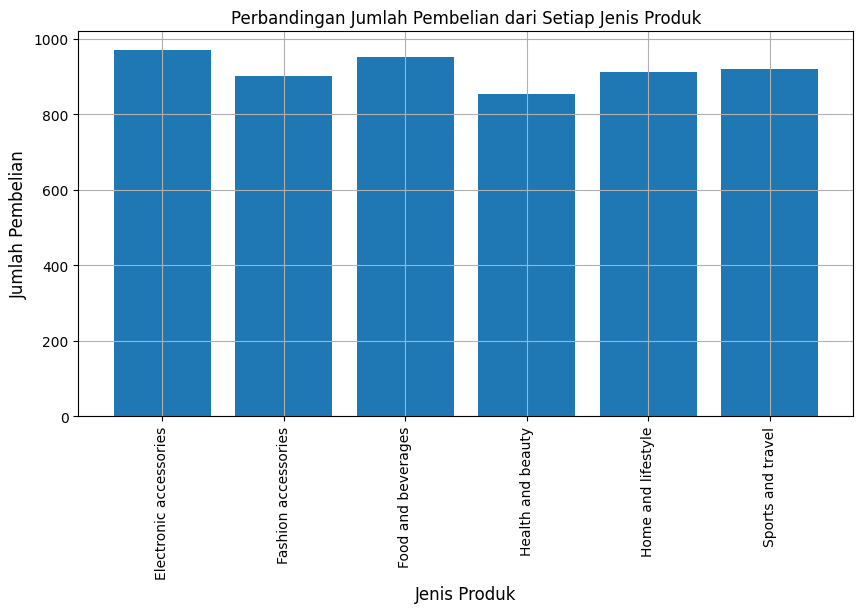

In [ ]:
produk = [Product_line for Product_line, df in df.groupby('Product line')]
plt.figure(figsize=(10,5))
plt.bar(produk, Produk['Quantity'])
plt.xticks(produk,rotation = 'vertical')
plt.title('Perbandingan Jumlah Pembelian dari Setiap Jenis Produk')
plt.ylabel('Jumlah Pembelian', fontsize=12)
plt.xlabel('Jenis Produk', fontsize=12)
plt.grid()
plt.show()

In [ ]:
produk=df.groupby(['Product line']).sum().sort_values('Product line',ascending=True)
produk=produk[['Quantity','Total', 'gross income']].round(2)
produk

<ipython-input-116-0107ac0fc5f2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  produk=df.groupby(['Product line']).sum().sort_values('Product line',ascending=True)


,Quantity,Total,gross income
Product line,,,
Electronic accessories,971,54337.53,2587.50
Fashion accessories,902,54305.90,2586.00
Food and beverages,952,56144.84,2673.56
Health and beauty,854,49193.74,2342.56
Home and lifestyle,911,53861.91,2564.85
Sports and travel,920,55122.83,2624.90


**Kota yang Paling Banyak Pembeli**

Text(0.5, 1.0, 'Perbandingan Jumlah Pembeli tiap Cabang')

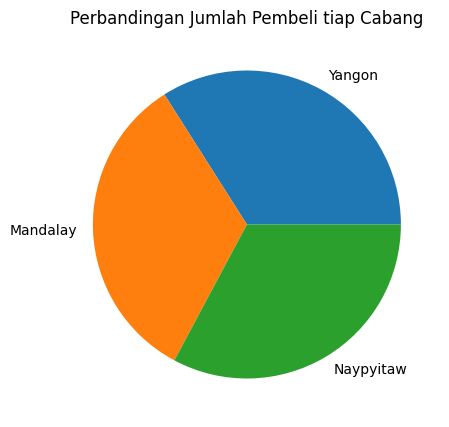

In [ ]:
plt.figure(figsize=(15,5))
df['City'].value_counts().plot.pie()
plt.ylabel('')
plt.title('Perbandingan Jumlah Pembeli tiap Cabang')

In [ ]:
kota=df.groupby(['City']).sum().sort_values('City', ascending=False)
kota=kota[['Quantity','Total', 'gross income']].round(2)
kota

<ipython-input-113-f27deceeb72f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kota=df.groupby(['City']).sum().sort_values('City', ascending=False)


,Quantity,Total,gross income
City,,,
Yangon,1859,106200.37,5057.16
Naypyitaw,1831,110568.71,5265.18
Mandalay,1820,106197.67,5057.03
